In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import time 
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
client_id = 'XXX'
client_secret = 'XXX'


client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [3]:
import requests

def get_access_token(client_id, client_secret):
    token_url = "https://accounts.spotify.com/api/token"
    auth = (client_id, client_secret)
    data = {
        "grant_type": "client_credentials"
    }

    response = requests.post(token_url, data=data, auth=auth)
    token_data = response.json()
    access_token = token_data.get("access_token")
    return access_token

access_token = get_access_token(client_id, client_secret)


In [4]:
def get_all_track_ids(playlist_id, access_token):
    headers = {
        "Authorization": f"Bearer {access_token}"
    }

    track_ids = []

    url = f"https://api.spotify.com/v1/playlists/{playlist_id}/tracks"
    while url:
        response = requests.get(url, headers=headers)
        data = response.json()

        for item in data.get("items", []):
            track = item.get("track", {})
            track_id = track.get("id")
            if track_id:
                track_ids.append(track_id)

        url = data.get("next")

    return track_ids

playlist_id = "XXX"

track_ids = get_all_track_ids(playlist_id, access_token)

In [7]:
def getTrackFeatures(id):
    meta = sp.track(id)
    features = sp.audio_features(id)
    trackid = id 
    name = meta['name']
    album = meta['album']['name']
    artist = meta['album']['artists'][0]['name']
    release_date = meta['album']['release_date']
    length = meta['duration_ms']
    popularity = meta['popularity']
    acousticness = features[0]['acousticness']
    danceability = features[0]['danceability']
    energy = features[0]['energy']
    instrumentalness = features[0]['instrumentalness']
    liveness = features[0]['liveness']
    loudness = features[0]['loudness']
    speechiness = features[0]['speechiness']
    tempo = features[0]['tempo']
    time_signature = features[0]['time_signature']
    track = [trackid, name, album, artist, release_date, length, popularity, acousticness, danceability, energy, instrumentalness, liveness, loudness, speechiness, tempo, time_signature]
    return track

In [8]:
tracks = []
for i in range(0, len(track_ids)):
    time.sleep(.5)
    track = getTrackFeatures(track_ids[i])
    tracks.append(track)

df = pd.DataFrame(tracks, columns = ['trackid', 'name', 'album', 'artist', 'release_date', 'length', 'popularity', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'time_signature'])
df.to_csv("pointblanc.csv", sep = ',')

In [14]:
df = pd.read_csv("pointblanc.csv")

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472 entries, 0 to 471
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   trackid           472 non-null    object 
 1   name              472 non-null    object 
 2   album             472 non-null    object 
 3   artist            472 non-null    object 
 4   release_date      472 non-null    object 
 5   length            472 non-null    int64  
 6   popularity        472 non-null    int64  
 7   acousticness      472 non-null    float64
 8   danceability      472 non-null    float64
 9   energy            472 non-null    float64
 10  instrumentalness  472 non-null    float64
 11  liveness          472 non-null    float64
 12  loudness          472 non-null    float64
 13  speechiness       472 non-null    float64
 14  tempo             472 non-null    float64
 15  time_signature    472 non-null    int64  
dtypes: float64(8), int64(3), object(5)
memory us

In [16]:
df.head()

,trackid,name,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,2gbMPBrBVj3CuNTLp2dHYs,Off The Grid,Donda,Kanye West,29-08-2021,339249,0,0.043800,0.546,0.640,0.000000,0.137,-5.582,0.370,137.728,4
1,0RbW8kWozrVSIGb4V13o0o,Hurricane,Donda,Kanye West,29-08-2021,243187,3,0.046600,0.587,0.561,0.000000,0.109,-6.569,0.146,80.009,4
2,2tUL6dZf1mywCj5WvCPZw6,No Friends In The Industry,Certified Lover Boy,Drake,03-09-2021,204346,73,0.018100,0.840,0.744,0.000000,0.629,-4.751,0.113,83.737,4
3,2Q3jFbyE61mCjS3SkW4toJ,Race My Mind,Certified Lover Boy,Drake,03-09-2021,269883,69,0.179000,0.488,0.635,0.000008,0.156,-7.190,0.260,174.072,4
4,0k1WUmIRnG3xU6fvvDVfRG,Way 2 Sexy (with Future & Young Thug),Certified Lover Boy,Drake,03-09-2021,257604,78,0.000619,0.803,0.597,0.000005,0.323,-6.035,0.141,136.008,4


In [17]:
df["artist"].nunique()

179

In [18]:
df["album"].nunique()

380

In [20]:
notfeatures = ['trackid' ,'name', 'artist','album','release_date']
track_info = df[notfeatures]
df1 = df.drop(columns=notfeatures)

In [21]:
df1.head()

,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,339249,0,0.043800,0.546,0.640,0.000000,0.137,-5.582,0.370,137.728,4
1,243187,3,0.046600,0.587,0.561,0.000000,0.109,-6.569,0.146,80.009,4
2,204346,73,0.018100,0.840,0.744,0.000000,0.629,-4.751,0.113,83.737,4
3,269883,69,0.179000,0.488,0.635,0.000008,0.156,-7.190,0.260,174.072,4
4,257604,78,0.000619,0.803,0.597,0.000005,0.323,-6.035,0.141,136.008,4


In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
scaler = StandardScaler()
X_std = scaler.fit_transform(df1)
pca = PCA()
pca.fit(X_std)
evr = pca.explained_variance_ratio_

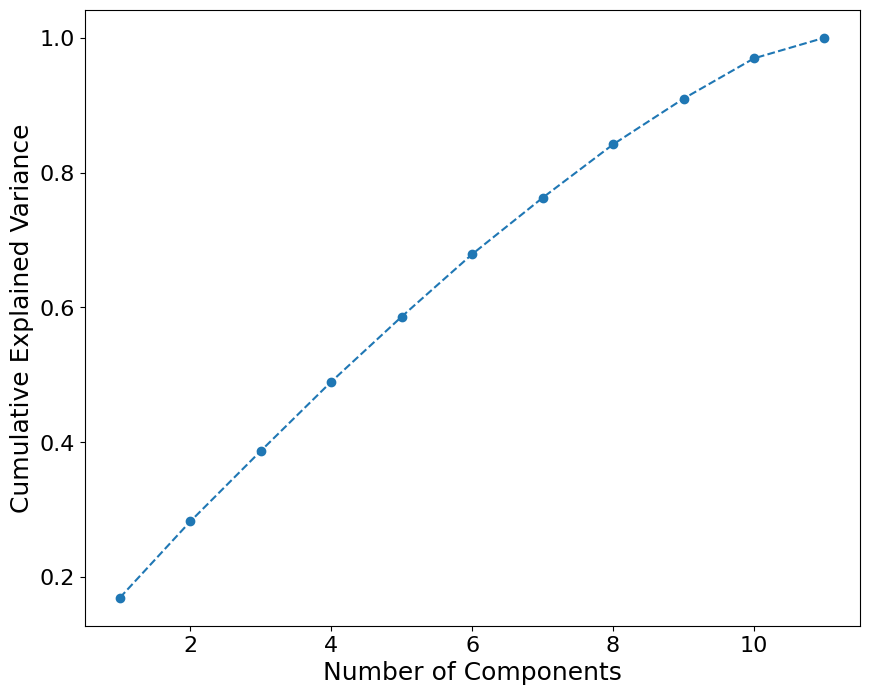

In [23]:
fig = plt.figure(figsize=(10,8))
plt.plot(range(1, len(df1.columns)+1), evr.cumsum(), marker='o', linestyle='--')
plt.xlabel('Number of Components', fontsize=18)
plt.ylabel('Cumulative Explained Variance',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
fig = plt.savefig("cumulative_variance_plot.png")
plt.show()

In [24]:
for i, exp_var in enumerate(evr.cumsum()):
    if exp_var >= 0.8:
        n_comps = i + 1
        break
print("Number of components:", n_comps)
pca = PCA(n_components=n_comps)
pca.fit(X_std)
scores_pca = pca.transform(X_std)

Number of components: 8


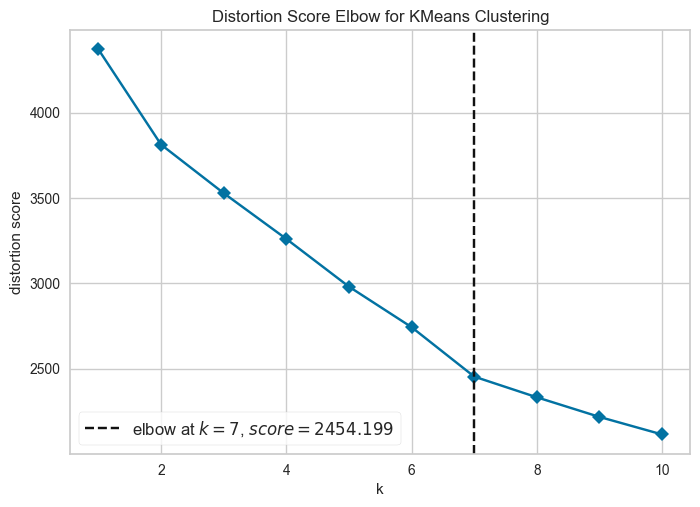

Optimal number of clusters: 7


In [25]:
from sklearn.cluster import KMeans
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer
visualizer = KElbowVisualizer(KMeans(init='k-means++', max_iter = 300, n_init = 10, random_state=0), k=(1,11), timings=False)
visualizer.fit(scores_pca)
visualizer.show()
n_clusters = visualizer.elbow_value_
print("Optimal number of clusters:", n_clusters)

In [26]:
kmeans_pca = KMeans(n_clusters=n_clusters,init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
kmeans_pca.fit(scores_pca);
df_seg_pca_kmeans = pd.concat([df1.reset_index(drop=True), pd.DataFrame(scores_pca)], axis=1)
df_seg_pca_kmeans.columns.values[(-1*n_comps):] = ["Component " + str(i+1) for i in range(n_comps)]
df_seg_pca_kmeans['Cluster'] = kmeans_pca.labels_
df_seg_pca_kmeans.head()

,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7,Component 8,Cluster
0,339249,0,0.043800,0.546,0.640,0.000000,0.137,-5.582,0.370,137.728,4,-0.987597,-0.080023,2.305855,-0.196554,-3.110457,-1.814066,-0.261303,-0.463071,4
1,243187,3,0.046600,0.587,0.561,0.000000,0.109,-6.569,0.146,80.009,4,-0.062135,1.056518,-0.352906,0.355596,-2.644647,-0.942708,-0.949337,-1.222813,4
2,204346,73,0.018100,0.840,0.744,0.000000,0.629,-4.751,0.113,83.737,4,-1.916848,0.983815,-0.577083,0.744813,0.086185,1.826072,2.473672,-1.163744,6
3,269883,69,0.179000,0.488,0.635,0.000008,0.156,-7.190,0.260,174.072,4,-0.164066,0.086052,2.501558,-0.303993,-0.040765,-1.650445,-0.084734,0.742066,1
4,257604,78,0.000619,0.803,0.597,0.000005,0.323,-6.035,0.141,136.008,4,-0.475165,-0.223543,1.248471,0.057629,0.448224,0.554386,0.812553,-1.308419,1


In [27]:
df_seg_pca_kmeans.head(10)

,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7,Component 8,Cluster
0,339249,0,0.043800,0.546,0.640,0.000000,0.137,-5.582,0.3700,137.728,4,-0.987597,-0.080023,2.305855,-0.196554,-3.110457,-1.814066,-0.261303,-0.463071,4
1,243187,3,0.046600,0.587,0.561,0.000000,0.109,-6.569,0.1460,80.009,4,-0.062135,1.056518,-0.352906,0.355596,-2.644647,-0.942708,-0.949337,-1.222813,4
2,204346,73,0.018100,0.840,0.744,0.000000,0.629,-4.751,0.1130,83.737,4,-1.916848,0.983815,-0.577083,0.744813,0.086185,1.826072,2.473672,-1.163744,6
3,269883,69,0.179000,0.488,0.635,0.000008,0.156,-7.190,0.2600,174.072,4,-0.164066,0.086052,2.501558,-0.303993,-0.040765,-1.650445,-0.084734,0.742066,1
4,257604,78,0.000619,0.803,0.597,0.000005,0.323,-6.035,0.1410,136.008,4,-0.475165,-0.223543,1.248471,0.057629,0.448224,0.554386,0.812553,-1.308419,1
5,199866,48,0.392000,0.657,0.492,0.000000,0.425,-9.612,0.1360,97.107,4,1.591081,1.721041,-0.621555,1.044931,-0.593751,-0.550313,1.331379,-0.257412,0
6,241655,55,0.064400,0.585,0.765,0.000000,0.148,-5.575,0.0589,145.155,4,-1.671174,0.378733,0.882550,-0.262252,0.052740,-0.890128,-0.859996,-0.317866,1
7,161052,66,0.003830,0.681,0.630,0.000000,0.139,-5.585,0.0385,151.951,4,-0.791388,-0.494137,-0.144054,0.159641,0.698115,-0.035696,-1.065504,-0.111989,1
8,188025,62,0.201000,0.672,0.654,0.000000,0.100,-4.528,0.0966,78.512,4,-0.484962,1.146690,-0.993811,-0.705556,0.034867,0.164122,-0.374148,-0.356367,0
9,212063,59,0.066800,0.321,0.525,0.000000,0.137,-9.891,0.1310,75.774,4,1.249066,2.470465,0.594743,0.678515,-1.383774,-1.323413,-0.526487,-0.249723,0


In [28]:
df['Cluster'] = df_seg_pca_kmeans['Cluster']
df

,trackid,name,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,Cluster
0,2gbMPBrBVj3CuNTLp2dHYs,Off The Grid,Donda,Kanye West,29-08-2021,339249,0,0.043800,0.546,0.640,0.000000,0.1370,-5.582,0.3700,137.728,4,4
1,0RbW8kWozrVSIGb4V13o0o,Hurricane,Donda,Kanye West,29-08-2021,243187,3,0.046600,0.587,0.561,0.000000,0.1090,-6.569,0.1460,80.009,4,4
2,2tUL6dZf1mywCj5WvCPZw6,No Friends In The Industry,Certified Lover Boy,Drake,03-09-2021,204346,73,0.018100,0.840,0.744,0.000000,0.6290,-4.751,0.1130,83.737,4,6
3,2Q3jFbyE61mCjS3SkW4toJ,Race My Mind,Certified Lover Boy,Drake,03-09-2021,269883,69,0.179000,0.488,0.635,0.000008,0.1560,-7.190,0.2600,174.072,4,1
4,0k1WUmIRnG3xU6fvvDVfRG,Way 2 Sexy (with Future & Young Thug),Certified Lover Boy,Drake,03-09-2021,257604,78,0.000619,0.803,0.597,0.000005,0.3230,-6.035,0.1410,136.008,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,6PGoSes0D9eUDeeAafB2As,LOVE. FEAT. ZACARI.,DAMN.,Kendrick Lamar,14-04-2017,213400,85,0.264000,0.800,0.585,0.000000,0.1530,-7.343,0.0924,126.058,4,0
468,4AO1XhrgJczQ9bNVxdfKQe,WHAT TO DO? (feat. Don Toliver),JACKBOYS,JACKBOYS,27-12-2019,250141,69,0.069500,0.643,0.594,0.000015,0.1150,-5.191,0.0312,118.037,4,1
469,6RN73O4iZHd9JQ4JHuul95,Sittin' On Top Of The World (feat. 21 Savage),Sittin' On Top Of The World (feat. 21 Savage),Burna Boy,22-06-2023,188290,71,0.032600,0.797,0.848,0.000218,0.1080,-4.484,0.0818,98.005,4,1
470,79fkjl9VtiLUl36ye9tMDP,Sneaky Link 2.0,Sneaky Link 2.0,HXLLYWOOD,01-10-2021,152790,56,0.212000,0.841,0.653,0.000000,0.0821,-6.978,0.3750,77.039,4,3


In [29]:
df.groupby("Cluster").describe()

length                                                               
         count           mean           std       min        25%       50%   
Cluster                                                                      
0         97.0  184752.309278  36538.608336  110938.0  158598.00  180434.0  \
1        167.0  204279.143713  42616.729010  122880.0  178326.00  198775.0   
2         14.0  202780.428571  60678.204946   64722.0  179256.00  204395.5   
3        101.0  196221.138614  53253.658585   97392.0  152371.00  197417.0   
4         44.0  189548.318182  41983.346240  125571.0  158874.50  186314.5   
5          2.0  174584.500000   9432.097354  167915.0  171249.75  174584.5   
6         47.0  206464.000000  54695.591653  130979.0  172282.50  190066.0   

                             popularity             ...      tempo            
               75%       max      count       mean  ...        75%      max   
Cluster                                             ...                       
0        207306.00  339066.0       97.0  65.917526  ...  122.97300  150.068  \
1        226089.50  343150.0      167.0  67.383234  ...  155.01650  186.003   
2        226049.50  325333.0       14.0  61.500000  ...  108.02975  153.034   
3        227555.00  386906.0      101.0  64.336634  ...  142.01600  192.099   
4        216305.50  339249.0       44.0   7.500000  ...  147.32925  180.175   
5        177919.25  181254.0        2.0  39.000000  ...  162.94350  162.948   
6        230459.00  440857.0       47.0  59.319149  ...  138.58800  170.691   

        time_signature                                               
                 count      mean       std  min  25%  50%  75%  max  
Cluster                                                              
0                 97.0  4.041237  0.199871  4.0  4.0  4.0  4.0  5.0  
1                167.0  4.000000  0.000000  4.0  4.0  4.0  4.0  4.0  
2                 14.0  2.714286  0.726273  1.0  3.0  3.0  3.0  3.0  
3                101.0  4.009901  0.099504  4.0  4.0  4.0  4.0  5.0  
4                 44.0  4.068182  0.254972  4.0  4.0  4.0  4.0  5.0  
5                  2.0  4.000000  0.000000  4.0  4.0  4.0  4.0  4.0  
6                 47.0  4.000000  0.000000  4.0  4.0  4.0  4.0  4.0  

[7 rows x 88 columns]

In [30]:
df['Cluster'].value_counts()

Cluster
1    167
3    101
0     97
6     47
4     44
2     14
5      2
Name: count, dtype: int64

In [31]:
cluster1=df.loc[ (df['Cluster']==0),['name', 'album', 'artist', 'release_date', 'length', 'popularity', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'time_signature']]
cluster2=df.loc[ (df['Cluster']==1),['name', 'album', 'artist', 'release_date', 'length', 'popularity', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'time_signature']]
cluster3=df.loc[ (df['Cluster']==2),['name', 'album', 'artist', 'release_date', 'length', 'popularity', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'time_signature']]
cluster4=df.loc[ (df['Cluster']==3),['name', 'album', 'artist', 'release_date', 'length', 'popularity', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'time_signature']]
cluster5=df.loc[ (df['Cluster']==4),['name', 'album', 'artist', 'release_date', 'length', 'popularity', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'time_signature']]
cluster6=df.loc[ (df['Cluster']==5),['name', 'album', 'artist', 'release_date', 'length', 'popularity', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'time_signature']]
cluster7=df.loc[ (df['Cluster']==6),['name', 'album', 'artist', 'release_date', 'length', 'popularity', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'time_signature']]
cluster8=df.loc[ (df['Cluster']==7),['name', 'album', 'artist', 'release_date', 'length', 'popularity', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'time_signature']]

In [32]:
cluster4

,name,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
20,Perplexing Pegasus - From SR3MM,SR3MM,Rae Sremmurd,04-05-2018,204787,58,0.000692,0.899,0.448,0.000024,0.3650,-8.789,0.0738,145.975,4
22,GSD,GSD,Aitch,12-08-2021,134347,45,0.381000,0.711,0.605,0.000000,0.1910,-10.686,0.4020,91.960,4
26,Better Believe,Better Believe,Belly,22-07-2021,206629,57,0.159000,0.797,0.573,0.000000,0.1440,-7.850,0.3190,124.995,4
32,p r i d e . i s . t h e . d e v i l (with Lil ...,The Off-Season,J. Cole,14-05-2021,218210,76,0.104000,0.861,0.656,0.000000,0.0986,-7.867,0.4250,88.967,4
33,Big Shot (with Travis Scott),Black Panther The Album Music From And Inspire...,Kendrick Lamar,09-02-2018,221826,64,0.007590,0.855,0.478,0.000000,0.1010,-9.116,0.1930,130.018,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,All My Life (feat. J. Cole),All My Life (feat. J. Cole),Lil Durk,12-05-2023,223878,88,0.150000,0.829,0.436,0.000000,0.0954,-8.205,0.3270,143.031,4
435,Sprinter,Sprinter,Dave,01-06-2023,229133,96,0.186000,0.916,0.583,0.000000,0.0798,-8.067,0.2410,141.095,4
447,I LIKE,I LIKE,Tory Lanez,22-04-2022,133521,73,0.365000,0.744,0.448,0.000000,0.1940,-10.426,0.2910,118.027,4
452,Money Trees,"good kid, m.A.A.d city",Kendrick Lamar,2012,386906,84,0.070300,0.716,0.531,0.000000,0.2240,-7.355,0.1220,71.994,4


In [33]:
df0=pd.DataFrame(cluster1, columns = ['name'])
array1=df0.values
df2=pd.DataFrame(cluster2, columns = ['name'])
array2=df2.values
df3=pd.DataFrame(cluster3, columns = ['name'])
array3=df3.values
df4=pd.DataFrame(cluster4, columns = ['name'])
array4=df4.values
df5=pd.DataFrame(cluster5, columns = ['name'])
array5=df5.values
df6=pd.DataFrame(cluster6, columns = ['name'])
array6=df6.values
df7=pd.DataFrame(cluster7, columns = ['name'])
array7=df7.values
df8=pd.DataFrame(cluster8, columns = ['name'])
array8=df8.values

In [34]:
from spotipy.oauth2 import SpotifyOAuth
REDIRECT_URI = "http://localhost:8888/callback"
USERNAME = "XXX" 
auth_create_playlist = SpotifyOAuth(
    client_id=client_id,
    client_secret=client_secret,
    redirect_uri=REDIRECT_URI,
    scope="playlist-modify-public playlist-modify-private",
)
create_playlist_token = auth_create_playlist.get_access_token(as_dict=False)
auth_add_songs = SpotifyOAuth(
    client_id=client_id,
    client_secret=client_secret,
    redirect_uri=REDIRECT_URI,
    scope="playlist-modify-public playlist-modify-private",
)
add_songs_token = auth_add_songs.get_access_token(as_dict=False)


In [35]:
def fuc_to_create_clusters(auth_id,userid,n_clusters):
    
    sp1 = spotipy.Spotify(auth=create_playlist_token)
    sp2 = spotipy.Spotify(auth=add_songs_token)
    for i in range(n_clusters):
        result = sp1.user_playlist_create(userid, '####'+str(i), public=True, collaborative=False, description='')
        playlist_id = result['id']
        songs = list(df.loc[df['Cluster'] == i]['trackid'])
        if len(songs) > 100:
            sp2.playlist_add_items(playlist_id, songs[:100])
            sp2.playlist_add_items(playlist_id, songs[100:])
        else:
            sp2.playlist_add_items(playlist_id, songs)
    
fuc_to_create_clusters(create_playlist_token,USERNAME,n_clusters)


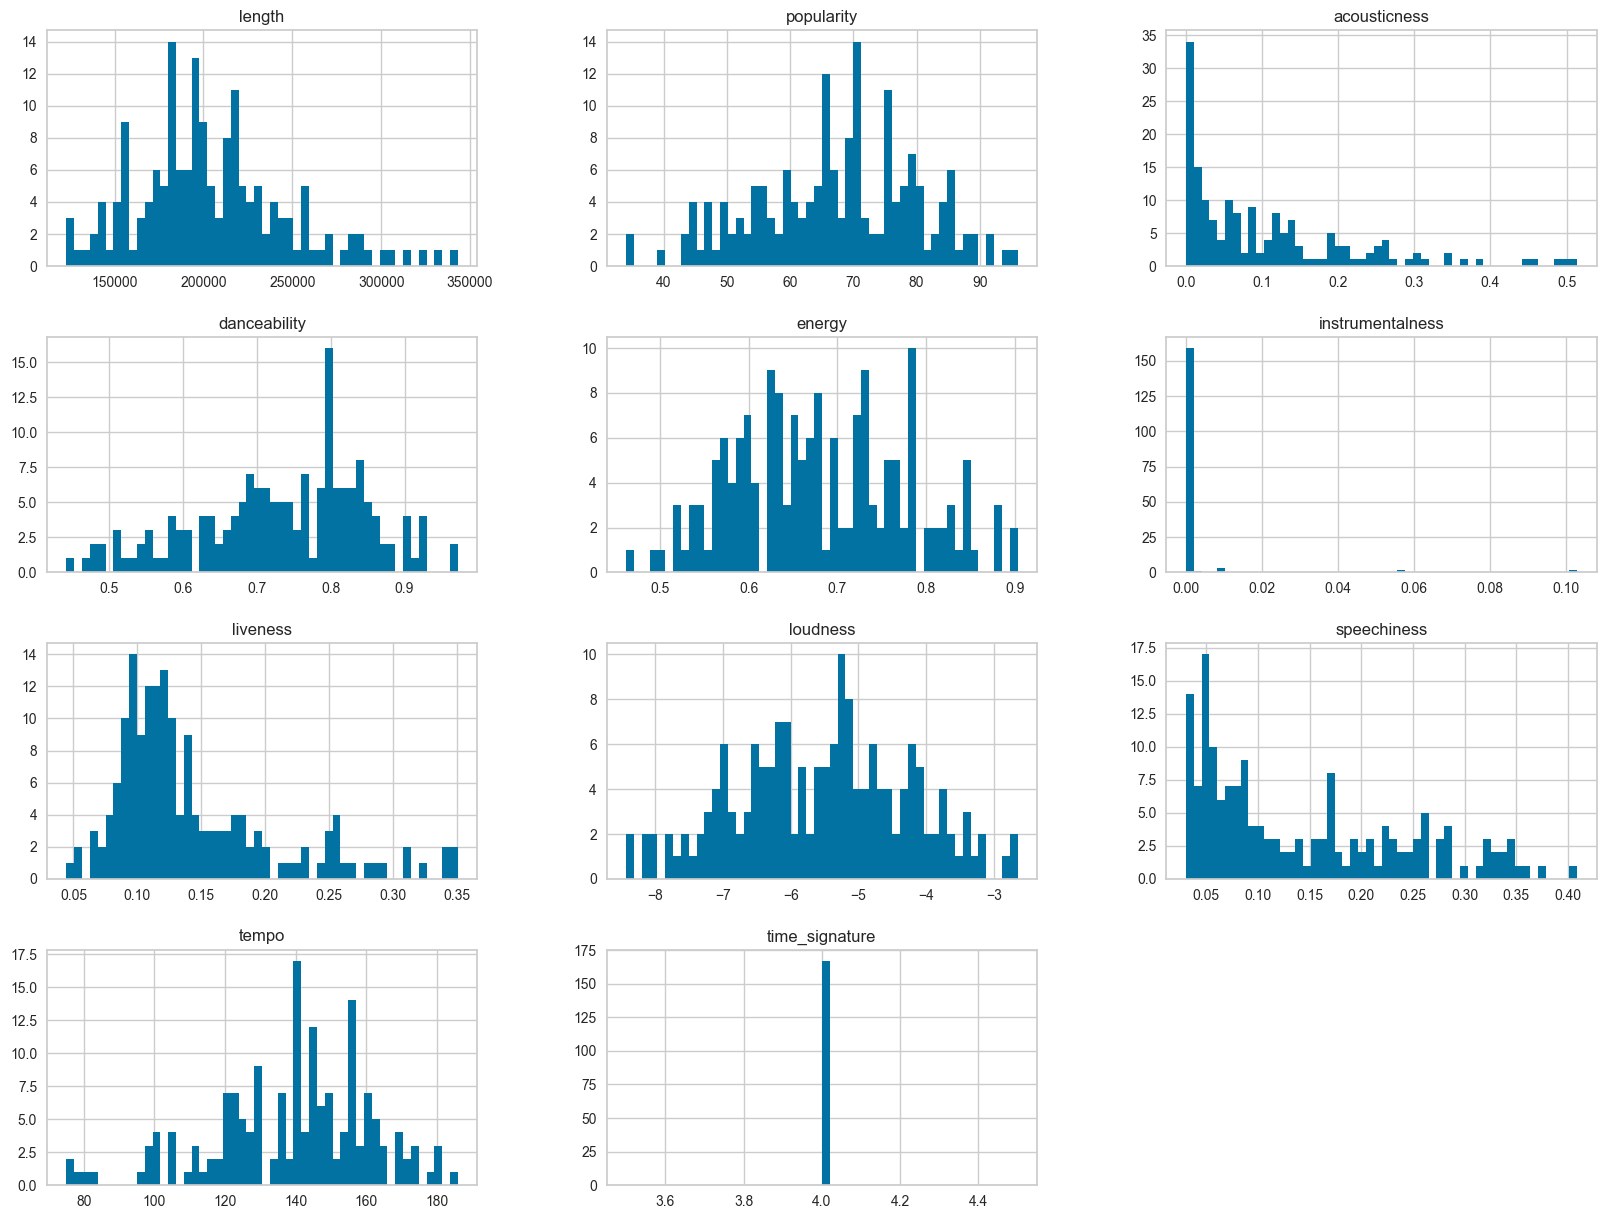

In [37]:
df2=pd.DataFrame(cluster2)
%matplotlib inline
import matplotlib.pyplot as plt
df2.hist(bins = 50, figsize=(20,15))
plt.show()

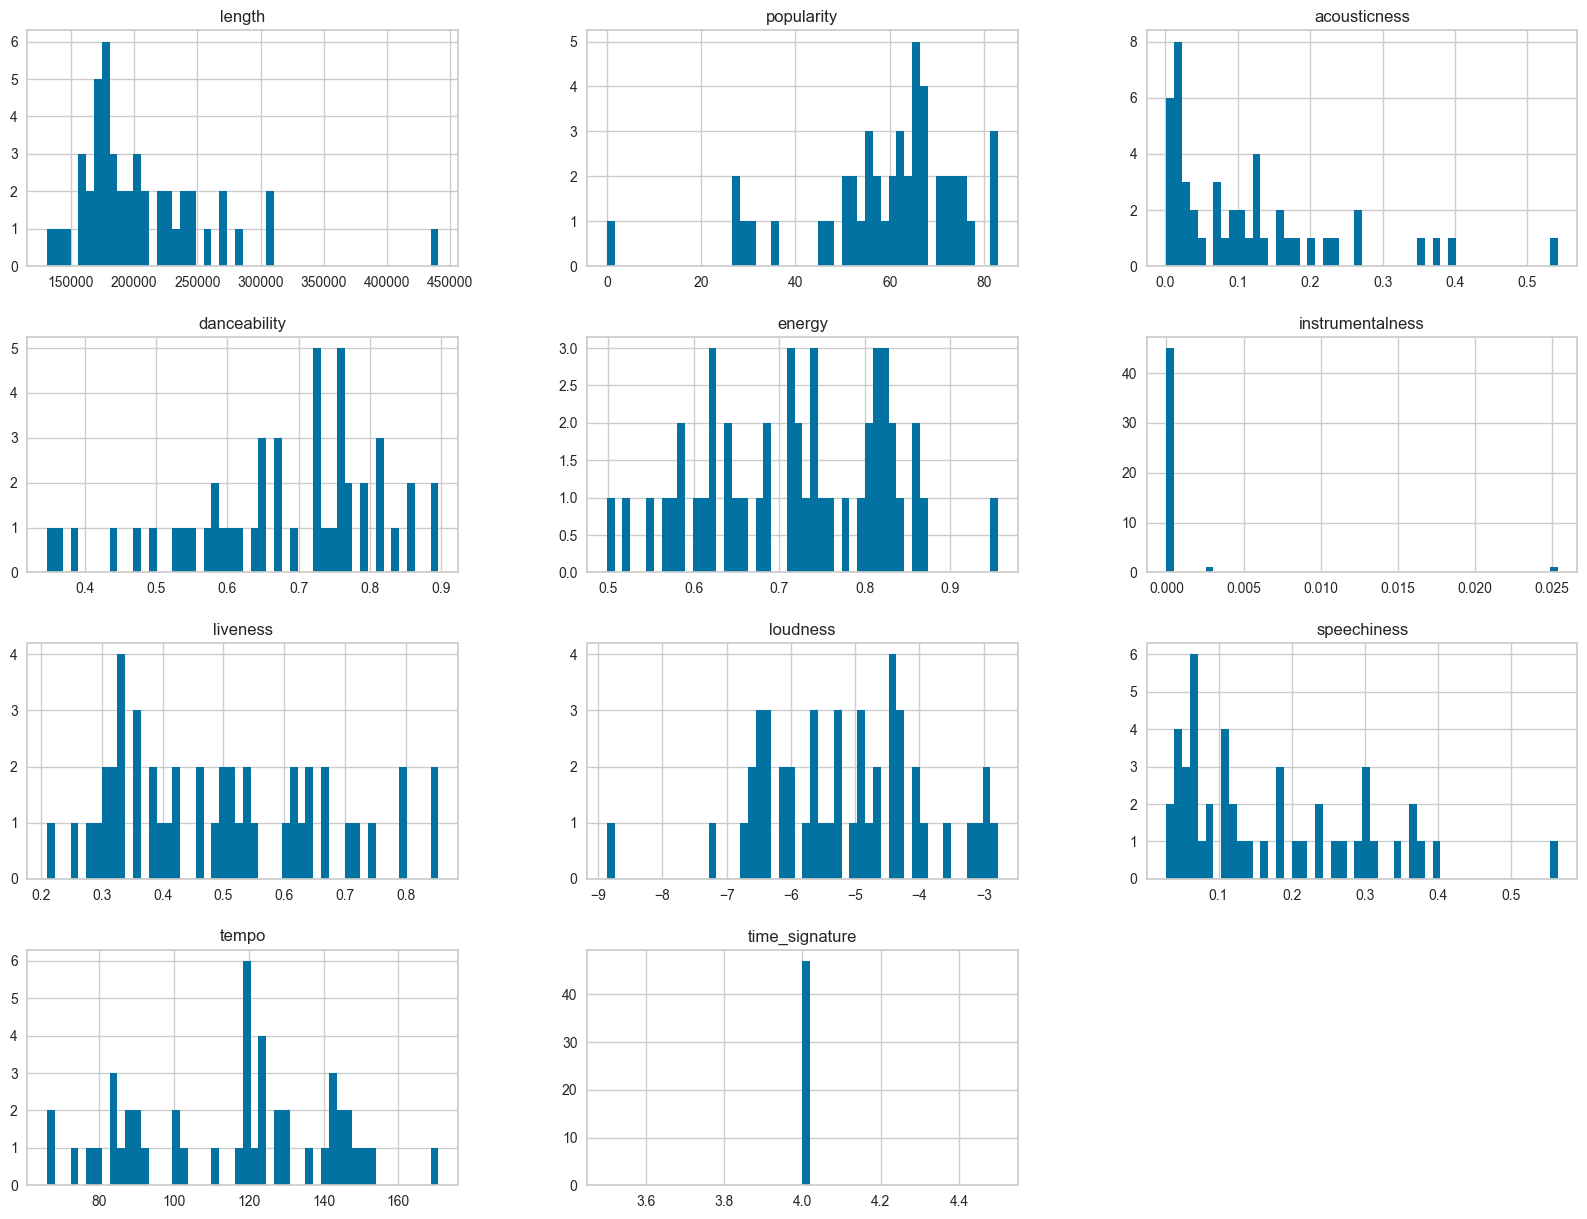

In [41]:
df7=pd.DataFrame(cluster7)
%matplotlib inline
import matplotlib.pyplot as plt
df7.hist(bins = 50, figsize=(20,15))
plt.show()